In [11]:
%matplotlib inline
import os
import numpy as np
import json
filepath='C:/measuring/'#only for local 

datapath = 'W:\Diamond\Projects\Cavities\Cavity characterisation paper\data/data_for_cav_char_paper/'
import scipy.signal
c = 2.997e8
os.chdir(filepath)
from analysis.lib.fitting import fit, common; reload(common)
from analysis.lib.tools import plot
import matplotlib.pyplot as plt


reloaded


In [12]:
import analysis.scripts.cavity.oscilloscope_analysis_linewidth as oscillo_ana
import analysis.scripts.cavity.functions_for_processing_linewidth_data as funcs

In [ ]:
LWs_LT = [2.04,2.05,1.83,1.96,2.01,2.0,1.78,1.8,1.96,1.61,1.86,1.36,1.64,2.27,2.22,2.26,1.87,2.05,1.99,1.94]
nr_lws = len(LWs_LT)
avg_lw = np.average(LWs_LT)
u_avg_lw = np.std(LWs_LT)

print '%d fitted; average linewidth = %.2f +- %.2f'%(nr_lws,avg_lw,u_avg_lw)

In [ ]:
lws = np.array([])

In [ ]:
indir = 'D:\measuring/data/20160907/145700_reflection_scope_trace'
filename = 'REFL000'
EOM_freq= 6.
reload(oscillo_ana)

oa_all = oscillo_ana.oscilloscope_analysis(indir=indir,filename=filename)
oa_all.get_data(use_timetrace=False,x_min=None,x_max=None,data_col=3)
oa_all.plot_data(plot_mod=True,figsize=(16,4),fmt='o')

x_min=64000
x_max=x_min+5000
oa_single = oscillo_ana.oscilloscope_analysis(indir=indir,filename=filename)
oa_single.get_data(use_timetrace=False,x_min=x_min,x_max=x_max,data_col=3)#1400)
oa_single.plot_data(plot_mod=False,figsize=(16,4),fmt='o')


In [ ]:


# for j,filename in enumerate(filenames):
#     oa = oscillo_ana.oscilloscope_analysis(indir=indir,filename=filename)
#     oa.get_data(use_timetrace=False,x_min=0,x_max=10000,data_col=3)#1400)
#     oa.plot_data()#plot_mod=True)

#     # lws_old=lws[:-1]
#     lws = np.array([])#lws_old## 
#     As = np.array([])#lws_old## 
#     gammas = np.array([])#lws_old## 
#     nr_lws=10

#     x0 =x0s[j]
#     windowsize=5000# print len(x)
#     # xi = int(len(x)/nr_lws)
#     # print xi 

#     x,y = oa.get_data(use_timetrace=False,data_col=3)
#     # lw,u_lw = oa.plot_and_fit_with_EOM(EOM_freq=EOM_freq)
#     # print lw

# 

In [ ]:
print len(good_lws)
print good_lws[-1]
print good_u_lws
print good_chisqs
print 'average lw %.2f +- %.2f'%(np.average(good_lws[:-1]) ,np.std(good_lws[:-1]))



In [ ]:
lw,u_lw,A1,u_a1,g,u_g,chi_sq = oa_single.plot_and_fit_with_EOM(EOM_freq=EOM_freq,
                                g_a1 = 0.01,g_A1 = 120000,g_A2=20000,g_A3=20000,g_gamma1=200,g_dx = 500,
                                show_fit=True,print_fit=True,plot_name=str(x_min))

print chi_sq

In [ ]:
lws = [1.18,1.48,1.37,2.22]

In [ ]:

# Parameters for

#g_x02 = 0.02
# g_gamma2 = 0.002

nr_datafiles = 9

linewidths = np.zeros((nr_datafiles,2))

reload(oscillo_ana)

for i in np.arange(nr_datafiles):
    fixed =[]#[0,1,2,5]
    
    g_a1 = 0.002
    g_A1 = 0.00004
    g_x01 = 0.002
    g_gamma1 = 0.0004
    g_dx = 0.0015
    g_A2 = 0.00002
    
    if i == 2:
        g_gamma1 = 0.0035
    indir='D:\measuring\data/20160430\OFF_diamond'#'D:\measuring\data/20160430\OFF_diamond'
    filename='OFFD00'+str(i)
    linewidth, u_linewidth = oscillo_ana.plot_and_fit(indir, filename,
                                                      g_a1, g_A1, g_x01, g_gamma1, g_dx, g_A2,fixed=fixed)
    print linewidth, u_linewidth
    linewidths[i,0]= linewidth
    linewidths[i,1] = u_linewidth
print linewidths

f = open(os.path.join(indir,'linewidth_data.txt'), 'w')
np.savetxt(f,linewidths)
f.close()

In [ ]:
nu=470.e12
Q = nu/(linewidths[1])
print Q
nu_FSR=c/(2*cavity_lengths[1])
F=Q*nu_FSR/nu
print F
F=nu_FSR/linewidths[1]
print F
print nu_FSR


In [ ]:
# plotting all in one!!! \
reload(funcs)

avg_finesse_RT_OFFD = np.average(funcs.finesses_from_lws(RT_OFFD_POS0_avgs[:,4],RT_OFFD_POS0_avgs[:,5],RT_OFFD_POS0_Ns)[0])
avg_finesse_LT_OFFD = np.average(funcs.finesses_from_lws(LT_OFFD_POS3_avg_array,LT_OFFD_POS3_std_array,LT_OFFD_POS3_Ns)[0])


###TODO - include diamond thickness
fig3,ax3 = plt.subplots(figsize=(6,4))
ax3 = funcs.plot_mean_lws_from_avgs(RT_OFFD_POS0_avgs,RT_OFFD_POS0_Ns,ax=ax3,label='RT OFFD POS0')
ax3 = funcs.plot_mean_lws(LT_OFFD_POS3_avg_array,LT_OFFD_POS3_std_array,LT_OFFD_POS3_Ns,ax=ax3,label='LT OFFD POS3')
ax3.set_title(folder+'/lw_vs_L_all_OFFD')
plt.savefig(os.path.join(folder,'lw_vs_L_all_OFFD.png'))
plt.show(fig3)


fig,ax = plt.subplots(figsize=(12,4))
ax = funcs.plot_mean_lws_from_avgs(RT_OND_POS0_avgs,RT_OND_POS0_Ns,ax=ax,label='RT OND POS0')
ax = funcs.plot_mean_lws_from_avgs(RT_OND_POS1_avgs,RT_OND_POS1_Ns,ax=ax,label='RT OND POS1')
ax = funcs.plot_mean_lws_from_avgs(RT_OND_POS2_avgs,RT_OND_POS2_Ns,ax=ax,label='RT OND POS2')

ax = funcs.plot_mean_lws(LT_OND_POS2_avg_array,LT_OND_POS2_std_array,LT_OND_POS2_Ns,ax=ax,label='LT OND POS2')
ax = funcs.plot_mean_lws(LT_OND_POS4_avg_array,LT_OND_POS4_std_array,LT_OND_POS4_Ns,ax=ax,label='LT OND POS4')

ax.set_title(folder+'/lw_vs_L_all_OND')
plt.savefig(os.path.join(folder,'lw_vs_L_all_OND.png'))
plt.show(fig)

###################### version 1 -both separate

fig4,ax4 = plt.subplots(figsize=(6,4))
ax4  = funcs.plot_finesse_vs_length_from_avgs(RT_OFFD_POS0_avgs,RT_OFFD_POS0_Ns,ax=ax4,label='RT OFFD POS0')
ax4 = funcs.plot_finesse_vs_length(LT_OFFD_POS3_avg_array,LT_OFFD_POS3_std_array,LT_OFFD_POS3_Ns,ax=ax4,label='LT OFFD POS3')
ax4.set_title(folder+'/Finesse_vs_L_all_OFFD')
ax4.legend(loc='lower right')
plt.savefig(os.path.join(folder,'Finesse_vs_L_all_OFFD.png'))
plt.show(fig4)

fig2,ax2 = plt.subplots(figsize=(12,4))
ax2 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS0_avgs,RT_OND_POS0_Ns,ax=ax2,label='RT OND POS0')
ax2 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS1_avgs,RT_OND_POS1_Ns,ax=ax2,label='RT OND POS1')
ax2 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS2_avgs,RT_OND_POS2_Ns,ax=ax2,label='RT OND POS2')

ax2 = funcs.plot_finesse_vs_length(LT_OND_POS2_avg_array,LT_OND_POS2_std_array,LT_OND_POS2_Ns,ax=ax2,label='LT OND POS2')
ax2 = funcs.plot_finesse_vs_length(LT_OND_POS4_avg_array,LT_OND_POS4_std_array,LT_OND_POS4_Ns,ax=ax2,label='LT OND POS4')

ax2.set_title(folder+'/Finesse_vs_L_all_OND')
plt.savefig(os.path.join(folder,'Finesse_vs_L_all_OND_vs1.png'))
plt.show(fig2)


###################### version 2 -OFF D average as a lines
fig5,ax5 = plt.subplots(figsize=(12,4))
ax5 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS0_avgs,RT_OND_POS0_Ns,ax=ax5,label='RT OND POS0')
ax5 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS1_avgs,RT_OND_POS1_Ns,ax=ax5,label='RT OND POS1')
ax5 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS2_avgs,RT_OND_POS2_Ns,ax=ax5,label='RT OND POS2')

ax5 = funcs.plot_finesse_vs_length(LT_OND_POS2_avg_array,LT_OND_POS2_std_array,LT_OND_POS2_Ns,ax=ax5,label='LT OND POS2')
ax5 = funcs.plot_finesse_vs_length(LT_OND_POS4_avg_array,LT_OND_POS4_std_array,LT_OND_POS4_Ns,ax=ax5,label='LT OND POS4')

ax5.plot(ax5.get_xlim(),[avg_finesse_RT_OFFD,avg_finesse_RT_OFFD],'--',color='orange' )
ax5.text(ax5.get_xlim()[0]+1,avg_finesse_RT_OFFD-2000,'RT OFFD',color='orange')

ax5.plot(ax5.get_xlim(),[avg_finesse_LT_OFFD,avg_finesse_LT_OFFD],'--',color='darkorange' )
ax5.text(ax5.get_xlim()[0]+1,avg_finesse_LT_OFFD-2000,'LT OFFD',color='darkorange')

ax5.set_title(folder+'/Finesse_vs_L_all_OND')
plt.savefig(os.path.join(folder,'Finesse_vs_L_all_OND_vs2.png'))
plt.show(fig5)





###################### version 2 -OFF D average as a lines
fig6,ax6 = plt.subplots(figsize=(12,4))
ax6  = funcs.plot_finesse_vs_length_from_avgs(RT_OFFD_POS0_avgs,RT_OFFD_POS0_Ns,ax=ax6,label='RT OFFD POS0')
ax6 = funcs.plot_finesse_vs_length(LT_OFFD_POS3_avg_array,LT_OFFD_POS3_std_array,LT_OFFD_POS3_Ns,ax=ax6,label='LT OFFD POS3')

ax6 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS0_avgs,RT_OND_POS0_Ns,ax=ax6,label='RT OND POS0')
ax6 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS1_avgs,RT_OND_POS1_Ns,ax=ax6,label='RT OND POS1')
ax6 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS2_avgs,RT_OND_POS2_Ns,ax=ax6,label='RT OND POS2')

ax6 = funcs.plot_finesse_vs_length(LT_OND_POS2_avg_array,LT_OND_POS2_std_array,LT_OND_POS2_Ns,ax=ax6,label='LT OND POS2')
ax6 = funcs.plot_finesse_vs_length(LT_OND_POS4_avg_array,LT_OND_POS4_std_array,LT_OND_POS4_Ns,ax=ax6,label='LT OND POS4')

ax6.set_title(folder+'/Finesse_vs_L_all_OND')
plt.savefig(os.path.join(folder,'Finesse_vs_L_all_OND_vs3.png'))
plt.show(fig6)
 


In [ ]:
reload(funcs)
#LT ON DIAMOND, POS 4
dir_L2 = os.path.join(datapath,'20160909/LT_OND_POS4_L2')
dir_L3 = os.path.join(datapath,'20160909/LT_OND_POS4_L3')
dir_L4 = os.path.join(datapath,'20160909/LT_OND_POS4_L4')
dir_L5 = os.path.join(datapath,'20160909/LT_OND_POS4_L5')

d_diamond_pos4 = 4.22e-6
N2s= [42,43,44]
N3s = [44,45,46,47]
N4s = [45,46,47,48]
N5s=[48,49,50,51]#educated guess for now
V2s=[0,1,2]
V3s=[0,1,2,3]
V4s=[0,1,2,3]
V5s = [0,1,2,3]
folder,avg_array2,std_array2 = funcs.get_LT_avg_array_from_json(V2s ,dir_L2)
folder,avg_array3,std_array3 = funcs.get_LT_avg_array_from_json(V3s ,dir_L3)
folder,avg_array4,std_array4 = funcs.get_LT_avg_array_from_json(V4s ,dir_L4)
folder,avg_array5,std_array5 = funcs.get_LT_avg_array_from_json(V5s ,dir_L5)


LT_OND_POS4_avg_array = np.concatenate((avg_array2,avg_array3,avg_array4,avg_array5))
LT_OND_POS4_std_array =np.concatenate((std_array2,std_array3,std_array4,std_array5))  
LT_OND_POS4_Ns = np.concatenate((N2s,N3s,N4s,N5s))


ax = funcs.plot_finesse_vs_length(LT_OND_POS4_avg_array,LT_OND_POS4_std_array,LT_OND_POS4_Ns)

funcs.plot_mean_lws(LT_OND_POS4_avg_array,LT_OND_POS4_std_array,LT_OND_POS4_Ns)

In [ ]:
#LT ON DIAMOND , POS 2
reload(funcs)
dir_L5 = os.path.join(datapath,'20160905/LT_OND_POS2_L5')
dir_L6 = os.path.join(datapath,'20160905/LT_OND_POS2_L6')
dir_L7 = os.path.join(datapath,'20160905/LT_OND_POS2_L7')

N2s= [69]
avg_array2 = [1.92]
std_array2 = [0.22]
V5s= [0,1,2,3]
N5s = [53,54,55,56]
V6s=[0,1,2,3]
N6s=[48,49,50,51]
V7s = [0,1,2,3]
N7s=[44,45,46,47]


folder,avg_array5,std_array5 = funcs.get_LT_avg_array_from_json(V5s ,dir_L5)
folder,avg_array6,std_array6 = funcs.get_LT_avg_array_from_json(V6s ,dir_L6)
folder,avg_array7,std_array7 = funcs.get_LT_avg_array_from_json(V7s ,dir_L7)


LT_OND_POS2_avg_array = np.concatenate((avg_array5,avg_array6,avg_array7,avg_array2)) 
LT_OND_POS2_std_array =  np.concatenate((std_array5,std_array6,std_array7,std_array2)) 
LT_OND_POS2_Ns = np.concatenate((N5s,N6s,N7s,N2s))

print LT_OND_POS2_avg_array

ax = funcs.plot_finesse_vs_length(LT_OND_POS2_avg_array,LT_OND_POS2_std_array,LT_OND_POS2_Ns)

funcs.plot_mean_lws(LT_OND_POS2_avg_array,LT_OND_POS2_std_array,LT_OND_POS2_Ns)

In [ ]:
#LT OFF DIAMOND , POS 3
dir_L0 = os.path.join(datapath,'20160907/LT_POS3_OFFD_L0')

N0s= [17]
V0s = [0]

folder,avg_array0,std_array0 = funcs.get_LT_avg_array_from_json(V0s ,dir_L0)

LT_OFFD_POS3_avg_array = avg_array0
LT_OFFD_POS3_std_array = std_array0
LT_OFFD_POS3_Ns = N0s


ax = funcs.plot_finesse_vs_length(LT_OFFD_POS3_avg_array,LT_OFFD_POS3_std_array,LT_OFFD_POS3_Ns)

funcs.plot_mean_lws(LT_OFFD_POS3_avg_array,LT_OFFD_POS3_std_array,LT_OFFD_POS3_Ns)

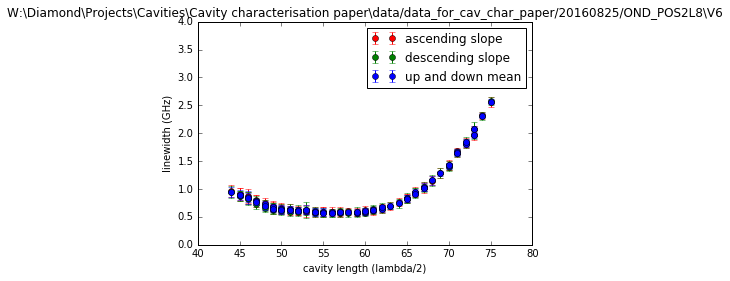

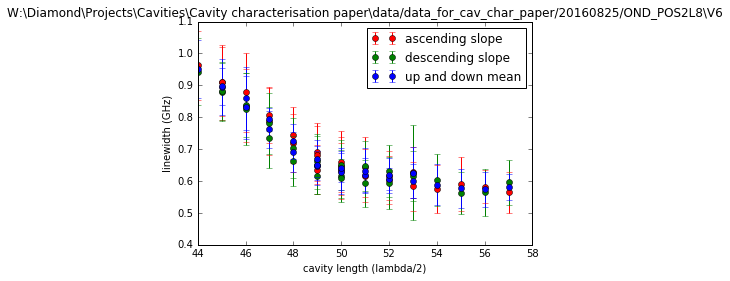

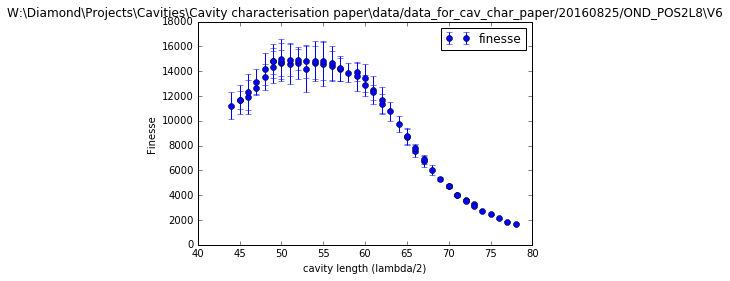

In [15]:
# ON DIAMOND LINEWIDTH< LENGHTS< POS2
dir_L2 = os.path.join(datapath,'20160825/OND_POS2L2')
dir_L3 = os.path.join(datapath,'20160825/OND_POS2L3')
dir_L4 = os.path.join(datapath,'20160825/OND_POS2L4')
dir_L5 = os.path.join(datapath,'20160825/OND_POS2L5')
dir_L6 = os.path.join(datapath,'20160825/OND_POS2L6')
dir_L7 = os.path.join(datapath,'20160825/OND_POS2L7')
dir_L8 = os.path.join(datapath,'20160825/OND_POS2L8')

L2_N0 = 70#73
L3_N0 = 65#68
L4_N0 = 59#62
L5_N0 = 54#57
L6_N0 = 49#48#49#48
L7_N0 = 45#44
L8_N0 = 44#42

nr_files_L3= 9
V2s=np.arange(0,0+9,1)
V3s=np.arange(0,0+9,1)
V4s=np.arange(0,0+9,1)
V5s=np.arange(0,0+9,1)
V6s=np.arange(0,0+9,1)
V7s=np.arange(0,0+9,1)
V8s=np.arange(0,0+7,1)


N2s = np.arange(L2_N0 ,L2_N0+9,1)#55,63
N3s= np.arange(L3_N0 ,L3_N0+9,1)
N4s= np.arange(L4_N0 ,L4_N0+9,1)
N5s= np.arange(L5_N0 ,L5_N0+9,1)
N6s= np.arange(L6_N0 ,L6_N0+9,1)
N7s= np.arange(L7_N0 ,L7_N0+9,1)
N8s= np.arange(L8_N0 ,L8_N0+7,1)

folder,avgs2=funcs.get_avg_array_for_Vs(V2s,1,dir_L2,tag='')
folder,avgs3=funcs.get_avg_array_for_Vs(V3s,1,dir_L3,tag='')
folder,avgs4=funcs.get_avg_array_for_Vs(V4s,1,dir_L4,tag='')
folder,avgs5=funcs.get_avg_array_for_Vs(V5s,1,dir_L5,tag='')
folder,avgs6=funcs.get_avg_array_for_Vs(V6s,1,dir_L6,tag='')
folder,avgs7=funcs.get_avg_array_for_Vs(V7s,1,dir_L7,tag='')
folder,avgs8=funcs.get_avg_array_for_Vs(V8s,1,dir_L8,tag='')


#RT_OND_POS2_avgs = np.append(np.append(np.append(np.append(np.append(np.append(avgs2,avgs3,axis=0),avgs4,axis=0),avgs5,axis=0),avgs6,axis=0),avgs7,axis=0),avgs8,axis=0)
RT_OND_POS2_avgs = np.concatenate((avgs2,avgs3,avgs4,avgs5,avgs6,avgs7,avgs8))
RT_OND_POS2_Ns = np.concatenate((N2s,N3s,N4s,N5s,N6s,N7s,N8s))

RT_OND_POS2_avgs_zoom= np.append(np.append(avgs7,avgs8,axis=0),avgs6,axis=0)
RT_OND_POS2_Ns_zoom= np.append(np.append(N7s,N8s,axis=0),N6s,axis=0)

ax = funcs.plot_updown_lws(RT_OND_POS2_avgs,RT_OND_POS2_Ns)
ax.set_title(folder)
plt.savefig(os.path.join(folder,'plot_lw_vs_L.png'))
plt.show()

ax = funcs.plot_updown_lws(RT_OND_POS2_avgs_zoom,RT_OND_POS2_Ns_zoom)
ax.set_title(folder)
plt.savefig(os.path.join(folder,'plot_lw_vs_L_zoom.png'))
plt.show()

ax,Finesses = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS2_avgs,RT_OND_POS2_Ns)
ax.set_title(folder)
plt.savefig(os.path.join(folder,'Finesse_vs_L.png'))
plt.show()


# ax = plot_mean_lws_from_avgs(avgs,Ns, label='mean pos 2')
# ax = plot_mean_lws_from_avgs(avgspos0,Nspos0, ax=ax, style ='go',label='mean pos 0')
# ax.set_title(datapath)
# plt.savefig(os.path.join(datapath,'plot_lw_vs_L_2positions.png'))
# plt.show()


analysis\lib\tools\plot.py:40: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if fit_xvals == None:


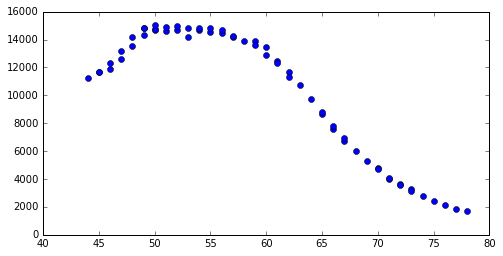

In [16]:

### Fit rclip


g_ROC = 15e-6
g_rclip = 30e-6
g_Transmission = 50e-6
g_Loss = 50e-6
fig,ax = plt.subplots(figsize=(8,4))
p0, fitfunc, fitfunc_str = common.fit_clipping_radius(g_ROC,g_rclip,g_Transmission,g_Loss)
# show_guess = True
# if show_guess:
#     ax.plot(np.linspace(x[0],x[-1],201), fitfunc(np.linspace(0,x[-1],201)), lw=2)
fit_result = fit.fit1d(RT_OND_POS2_Ns,Finesses, None, p0=p0, fitfunc=fitfunc, do_print=True, ret=True, fixed=[0])


x = np.linspace(min(RT_OND_POS2_Ns),max(RT_OND_POS2_Ns),10*len(RT_OND_POS2_Ns))
   
        
plot.plot_fit1d(fit_result,x, ax=ax, label='Fit',show_guess=True, 
                plot_data=True,color='red', print_info= False)
    
# rclip_fit=fit_result['params_dict']['rclip']
# #u_rclip_fit = fit_result['error_dict']['rclip']
# print rclip



plt.savefig(os.path.join(datapath,'plot_Finesse_vs_N_rclip_fit.png'))
plt.show()
plt.close()

In [ ]:
# off diamond position 0 RT
reload(funcs)
dir_L0 =os.path.join(datapath,'20160818/RT_OFFD_POS0_L0')
dir_L2= os.path.join(datapath,'20160818/RT_OFFD_POS0_L2')
dir_L3 = os.path.join(datapath,'20160819/RT_OFFD_POS0_L3')
#I relabeled the data in the dedicated folder (my docs) from V1p129 -> V0 etc. SvD 15-9-2016
V0s=[0,1,2]
V2s=[0,1,2,3]
V3s=[0,1,2,3,4,5]

#V0s = np.array([1.129,2.473,3.482])
#V2s = np.array([6.083,7.258,8.269,9.246])
#V3s = np.array([1.402,2.646,3.781,4.846,5.864,6.890])
N0s = np.array([21,22,23])#possibly the N0s should be 21,22,23->not 100%clear. -> leave out?
N2s = np.array([13,14,15,16])
N3s = np.array([17,18,19,20,21,22])

folder,avgs0=funcs.get_avg_array_for_Vs(V0s,1,dir_L0,tag='')
folder,avgs2=funcs.get_avg_array_for_Vs(V2s,2,dir_L2,tag='')
folder,avgs3=funcs.get_avg_array_for_Vs(V3s,3,dir_L3,tag='')

RT_OFFD_POS0_avgs = np.concatenate((avgs0,avgs2,avgs3))
RT_OFFD_POS0_Ns = np.append(np.append(N0s,N2s),N3s)




ax = funcs.plot_updown_lws(RT_OFFD_POS0_avgs,RT_OFFD_POS0_Ns)
ax.set_title(folder)
plt.savefig(os.path.join(folder,'plot_lw_vs_L.png'))
plt.show()

ax = funcs.plot_finesse_vs_length_from_avgs(RT_OFFD_POS0_avgs,RT_OFFD_POS0_Ns)
ax.set_title(folder)
plt.savefig(os.path.join(folder,'Finesse_vs_L.png'))
plt.show()

In [ ]:
# ON DIAMOND LINEWIDTH< LENGHTS< POS0
reload(funcs)
dir_L0 = os.path.join(datapath,'20160819/RT_OND_POS0_L0')
dir_L1 = os.path.join(datapath,'20160819/RT_OND_POS0_L1')
dir_L2 = os.path.join(datapath,'20160819/RT_OND_POS0_L2')


V0s=np.arange(0,4,1)
V1s=np.arange(0,8,1)
V2s=np.arange(0,3,1)
print V0s,V1s,V2s


#V0s=np.array([2.935,4.088,5.183,6.182])
#V1s=np.array([2.139,3.587,4.753,5.836,6.891,7.928,8.909,9.958])
#V2s=np.array([6.957,8.738,9.866])

N0s = np.array([54,55,56,57])
N1s = np.array([45,46,47,48,49,50,51,52])#np.array([44,45,46,47,48,49,50,51])
N2s = np.array([52,53,54])#np.array([51,52,53])
print N0s,N1s,N2s


folder,avgs0=funcs.get_avg_array_for_Vs(V0s,1,dir_L0,tag='')
folder,avgs1=funcs.get_avg_array_for_Vs(V1s,1,dir_L1,tag='')
folder,avgs2=funcs.get_avg_array_for_Vs(V2s,1,dir_L2,tag='')

RT_OND_POS0_avgs = np.concatenate((avgs1,avgs2,avgs0))
RT_OND_POS0_Ns = np.concatenate((N1s,N2s,N0s))

##beunen begint hier
#avgsN52=[(avgs[7]+avgs[8])/2.]
#avgsN54=[(avgs[10]+avgs[11])/2.]
#avgspos0 = np.append(np.append(np.append(np.append(avgs[0:7],avgsN52,axis=0),[avgs[9]],axis=0),avgsN54,axis=0),avgs[12:],axis=0)
#print avgspos0
#N52=[(Ns[7]+Ns[8])/2.]
#N54=[(Ns[10]+Ns[11])/2.]
#Nspos0 = np.append(np.append(np.append(np.append(Ns[0:7],N52),Ns[9]),N54),Ns[12:])
#print Nspos0
##beunenn stopt hier

ax = funcs.plot_updown_lws(RT_OND_POS0_avgs,RT_OND_POS0_Ns)

ax.set_title(folder)
plt.savefig(os.path.join(folder,'plot_lw_vs_L.png'))
plt.show()

funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS0_avgs,RT_OND_POS0_Ns)


In [ ]:
# ON DIAMOND LINEWIDTH< LENGHTS< POS1 L2
reload(funcs)
dir_L1 = os.path.join(datapath,'20160822/RT_OND_POS1_L1')
dir_L3 = os.path.join(datapath,'20160822/RT_OND_POS1_L3')
dir_L4 = os.path.join(datapath,'20160822/RT_OND_POS1_L4')
dir_L5 = os.path.join(datapath,'20160822/RT_OND_POS1_L5')

V1s=np.arange(0,8,1)
V3s=np.arange(0,8,1)
V4s=np.arange(0,8,1)
V5s=np.arange(0,8,1)

#V0s=np.array([1.546,3.019,4.237,5.348,6.404,7.473,8.515,9.551])
#V3s=np.array([1.373,2.859,4.062,5.152,6.218,7.224,8.198,9.268])
#V4s=np.array([0.951,2.390,3.646,4.783,5.843,6.934,7.975,8.977])
#V5s=np.array([1.359,3.383,4.565,5.620,6.695,7.727,8.734,9.832])

N1s = np.arange(53,61,1)#55,63#53,61
N3s = np.arange(47,55,1)#49,57#46,55
N4s = np.arange(44,52,1)
N5s = np.arange(39,47,1)

folder,avgs1=funcs.get_avg_array_for_Vs(V1s,1,dir_L1,tag='')
folder,avgs3=funcs.get_avg_array_for_Vs(V3s,1,dir_L3,tag='')
folder,avgs4=funcs.get_avg_array_for_Vs(V4s,1,dir_L4,tag='')
folder,avgs5=funcs.get_avg_array_for_Vs(V5s,1,dir_L5,tag='')

RT_OND_POS1_avgs=np.concatenate((avgs1,avgs3,avgs4,avgs5))
RT_OND_POS1_Ns=np.concatenate((N1s,N3s,N4s,N5s))

ax = funcs.plot_updown_lws(RT_OND_POS1_avgs,RT_OND_POS1_Ns)
ax.set_title(folder)
plt.savefig(os.path.join(folder,'plot_lw_vs_L.png'))
plt.show()

funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS1_avgs,RT_OND_POS1_Ns)
ax.set_title(folder)
plt.savefig(os.path.join(folder,'Finesse_vs_L.png'))
plt.show()


# ax = plot_mean_lws(avgs,Ns, label='mean pos 1')
# ax = plot_mean_lws(avgspos0,Nspos0, ax=ax, style ='go',label='mean pos 0')
# ax.set_title(datapath)
# plt.savefig(os.path.join(datapath,'plot_lw_vs_L_2positions.png'))
# plt.show()

In [ ]:
# ON DIAMOND LINEWIDTH< LENGHTS< POS0
#initial analayysis (manual)
reload(funcs)
linewidths1 = np.array([1.65,1.46, 1.62,1.70,1.67, 1.49,1.24,1.18])
linewidths2 = np.array([0.809,0.798,0.799,0.792])
linewidths3 = np.array([0.93,1.03,1.19])
u_linewidths1 = np.array([0.06,0.04,0.04,0.04,0.04,0.04,0.04,0.04])
u_linewidths2 = np.array([0.03,0.033,0.031,0.034])
u_linewidths3 = np.array([0.04,0.04,0.04])

linewidths=np.append(np.append(linewidths1 ,linewidths2),linewidths3)
u_linewidths=np.append(np.append(u_linewidths1 ,u_linewidths2),u_linewidths3)


In [ ]:
# OFF DIAMOND LINEWIDTH< LENGHTS< 

linewidths = np.array([1.26,1.17,1.09,1.04,0.97,0.92,0.88,0.83,0.79,0.77])*1.e9
u_linewidths = np.array([0.04,0.05,0.05,0.05,0.03,0.04,0.03,0.03,0.04,0.03])*1.e9
N = np.array([13,14,15,16,17,18,19,20,21,22])
cavity_lengths =  636.6*1.e-9*N/2
print linewidths,u_linewidths,cavity_lengths



In [ ]:
# V = 1.129
#8 um at  4.611, 
#so 
#removed 0.8+-0.03 @ N=22
#23,24,0.76,0.76,0.04,0.03,
fig,ax = plt.subplots()
ax.errorbar(cavity_lengths*1.e6,linewidths*1.e-9,yerr=u_linewidths*1.e-9,fmt='o')
ax.set_xlabel('cavity length (um)')
ax.set_ylabel('linewidth (GHz)')


In [ ]:
reload(common)
g_a = 0.1e9
g_b = (c)/(2*40000)
print g_b
print cavity_lengths,linewidths
p0, fitfunc, fitfunc_str = common.fit_inverse(g_a, g_b)
fit_result = fit.fit1d(cavity_lengths,linewidths, None, p0=p0, fitfunc=fitfunc, do_print=True, ret=True, fixed=[])
print p0
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(cavity_lengths,linewidths)
plot.plot_fit1d(fit_result, np.linspace(min(cavity_lengths),max(cavity_lengths),10*len(cavity_lengths)),ax=ax, label='Fit',show_guess=True, plot_data=True,color='red', data_linestyle = 'o', print_info= True)
b_fit=fit_result['params_dict']['b']
Finesse = c/(2*b_fit)
ax.set_title(str(Finesse))
# ax.text(0.1,0.1,'the finesse is '+str(Finesse))
print Finesse

In [ ]:
indir = 'D:\measuring\data/20160914/HR_ANN_PROC_L0/V-1'
filename = 'LWS006'
EOM_freq= 7.
data_col=2
reload(oscillo_ana)

oa_all = oscillo_ana.oscilloscope_analysis(indir=indir,filename=filename)
x,y=oa_all.get_data(use_timetrace=False,x_min=None,x_max=None,data_col=data_col)
oa_all.get_data(use_timetrace=False,x_min=None,x_max=100000,data_col=data_col)
oa_all.plot_data(plot_mod=False,figsize=(16,4),fmt='o')
print len(x)

test=True
x0 =2100
x_odd_offset =0

ms_per_div = 10 
mod_frequency = 50 #Hz

windowsize=200# print len(x)
g_gamma = 6
g_dx=26
g_A=1.4
max_chisq=0.01#0.003#0.007#0.004#0.001#0.04

nr_lws=20.*mod_frequency*ms_per_div/1000.



oscillo_ana.fit_all_resonances_in_sweep(nr_lws,x0,windowsize,x_odd_offset,g_gamma,g_dx,g_A,max_chisq,test=test,total_length=125000,data_col=data_col)



In [ ]:
#


In [ ]:
reload(oscillo_ana)
indir='D:\measuring\data/20160825/OND_POS2L8'#'D:\measuring\data/20160430\OFF_diamond'
# filenames=['V0/NICE_LWS00168','V1/NICE_LWS00167','V-1/NICE_LWS00169',\
#           'V3/NICE_LWS00163','V4/NICE_LWS00164','V5/NICE_LWS00165',\
#           'V6/NICE_LWS00166']
indir = 'D:\measuring\data/20160830/135900'
filename = 'LT_LWS003'
filenames=[filename]#['V0/NICE_LWS00168','V1/NICE_LWS00167','V-1/NICE_LWS00169']
EOM_freq=6. # in GHz
# x0s = [200,170,850,650,1100,750,400]
# dx0s = [0,0,0,0,0,0,0,0,0]

x0s = [5000,700,850]
dx0s = [0,0,0]

for j,filename in enumerate(filenames):
    oa = oscillo_ana.oscilloscope_analysis(indir=indir,filename=filename)
    oa.get_data(use_timetrace=False,x_min=0,x_max=10000,data_col=3)#1400)
    oa.plot_data()#plot_mod=True)

    # lws_old=lws[:-1]
    lws = np.array([])#lws_old## 
    As = np.array([])#lws_old## 
    gammas = np.array([])#lws_old## 
    nr_lws=10

    x0 =x0s[j]
    windowsize=5000# print len(x)
    # xi = int(len(x)/nr_lws)
    # print xi 

    x,y = oa.get_data(use_timetrace=False,data_col=3)
    # lw,u_lw = oa.plot_and_fit_with_EOM(EOM_freq=EOM_freq)
    # print lw

    for i in np.arange(nr_lws):
        xi = int(x0+(len(x)*i/nr_lws))

        if i%2==1:
            xi=xi+dx0s[j]   
        if (xi-windowsize)>0:
            x_min = xi-windowsize
        else: 
            x_min = 0
        if (xi+windowsize)<len(x)-1:
            x_max = xi+windowsize
        else:
            x_max =-1
        oa.get_data(use_timetrace=False,x_min = x_min, x_max=x_max,data_col=3)
    #     oa.plot_data()
        print i
        lw,u_lw,A1,u_A1,gamma1,u_gamma1 = \
            oa.plot_and_fit_with_EOM(EOM_freq=EOM_freq,
                g_gamma1=500, g_dx=1000,g_A2=10000,g_A3=10000,show_fit=True,print_fit=False)
        lws = np.append(lws,lw)
        As = np.append(As,A1)
        gammas = np.append(gammas,gamma1)
        if i>1:
            break

    print lws
    print len(lws)
    print np.average(lws)
    print np.std(lws)

    f = open(os.path.join(indir,filename+'_fitted_lws.txt'), 'w')
    np.savetxt(f,lws)
    f.close()
    f = open(os.path.join(indir,filename+'_fitted_As.txt'), 'w')
    np.savetxt(f,As)
    f.close()
    f = open(os.path.join(indir,filename+'_fitted_gammas.txt'), 'w')
    np.savetxt(f,gammas)
    f.close()

# plt.show()

# x,y = oscillo_ana.plot_data(indir, filename,use_timetrace=False,x_min=x_min,x_max=x_max)

# oscillo_ana.plot_and_fit_with_EOM(indir, filename,EOM_frq,g_a1, g_A1, g_x01, g_gamma1, g_dx, g_A2,g_A3,fixed=fixed,use_timetrace=False)

In [ ]:

# print len(lws)
# print lws
# lws_old=lws[120:]
# print len(lws_old)
# print lws_old
# #print lws_old
# f = open(os.path.join(indir,'fitted_lws.txt'), 'w')
# np.savetxt(f,lws_old)
# f.close()

In [ ]:
# indir='D:\measuring\data/20160819/OND_L2_V9p866'#
lws_from_file={}
for filename in filenames:
    print filename

    f = open(os.path.join(indir,filename+'_fitted_lws.txt'), 'r')
    lws_from_file[filename] = np.loadtxt(f)
    f.close()
    
    print len(lws_from_file[filename])

    os.listdir(indir)
    # filename='NICE_LWS00058'
    reload(oscillo_ana)
    oa = oscillo_ana.oscilloscope_analysis(indir=indir,filename=filename)
    oa.get_data(use_timetrace=False,x_max=2000)#5000
    oa.plot_data(plot_mod=True)
    #oa.get_data(use_timetrace=False,x_min=-2000)
    #oa.plot_data(plot_mod=True)

In [ ]:
first_lw_directions = ['u','u','u','u','u','u','d']

In [ ]:
#IF SINGLE FILE EXECUTE THIS CELL:
for i,filename in enumerate(filenames):
    first_lw_direction = first_lw_directions[i]

    updown_mean_lws,lws_up,lws_down =funcs.get_up_down_lws(lws_from_file[filename],first_lw_direction)
    analysis=funcs.add_to_analysis_dict({},lws_up,lws_down,updown_mean_lws)
    funcs.save_to_json_file(indir,filename+'_analysis',analysis)

    print 'results of ',indir,filename
    print_results(analysis)


In [ ]:
#IF THREE FILES EXECUTE THIS AND THE FOLLWING CELLS:

file1_first_lw_direction = 'up'
file2_first_lw_direction = 'up'
file3_first_lw_direction = 'down'
removedfromfile1=0
removedfromfile2=0


In [ ]:
fitted_lws_file1=lws_from_file[0:48-removedfromfile1]
fitted_lws_file2=lws_from_file[48-removedfromfile1:96-removedfromfile1-removedfromfile2]
fitted_lws_file3=lws_from_file[96-removedfromfile1-removedfromfile2:144]

print len(fitted_lws_file1),len(fitted_lws_file2),len(fitted_lws_file3)
#print fitted_lws_file1
#print fitted_lws_file2 
#print fitted_lws_file3

In [ ]:
funcs.save_to_txt_file(indir,'fitted_lws_file1',fitted_lws_file1)
funcs.save_to_txt_file(indir,'fitted_lws_file2',fitted_lws_file2)
funcs.save_to_txt_file(indir,'fitted_lws_file3',fitted_lws_file3)

updown_mean_lws_file1,lws_up_file1,lws_down_file1 =funcs.get_up_down_lws(fitted_lws_file1,file1_first_lw_direction)
updown_mean_lws_file2,lws_up_file2,lws_down_file2 =funcs.get_up_down_lws(fitted_lws_file2,file2_first_lw_direction)
updown_mean_lws_file3,lws_up_file3,lws_down_file3 =funcs.get_up_down_lws(fitted_lws_file3,file3_first_lw_direction)

updown_mean_lws = np.append(np.append(updown_mean_lws_file1,updown_mean_lws_file2),updown_mean_lws_file3)
lws_up = np.append(np.append(lws_up_file1,lws_up_file2),lws_up_file3)
lws_down = np.append(np.append(lws_down_file1,lws_down_file2),lws_down_file3)

analysis=funcs.add_to_analysis_dict({},lws_up,lws_down,updown_mean_lws)
analysis_file1=funcs.add_to_analysis_dict({},lws_up_file1,lws_down_file1,updown_mean_lws_file1)
analysis_file2=funcs.add_to_analysis_dict({},lws_up_file2,lws_down_file2,updown_mean_lws_file2)
analysis_file3=funcs.add_to_analysis_dict({},lws_up_file3,lws_down_file3,updown_mean_lws_file3)
funcs.save_to_json_file(indir,'analysis',analysis)
funcs.save_to_json_file(indir,'analysis_file1',analysis_file1)
funcs.save_to_json_file(indir,'analysis_file2',analysis_file2)
funcs.save_to_json_file(indir,'analysis_file3',analysis_file3)

print 'results of ',indir
print_results(analysis)
print_results(analysis_file1)
print_results(analysis_file2)
print_results(analysis_file3)

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

ax.plot(lws)
ax.set_xlabel('sweep nr')
ax.set_ylabel('linewidth')

In [ ]:
f = open(os.path.join(indir,'fitted_lws_file0010.txt'), 'w')
np.savetxt(f,lws)
f.close()

In [ ]:
copy_lws_from_file=lws_from_file
print co

In [ ]:
f = open(os.path.join(indir,'fitted_lws.txt'), 'w')
np.savetxt(f,new_lws_from_file)
f.close()